In [50]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats

In [51]:
file_path = 'D:/Classes/Python/Case Studies/Python Foundation Case Study 3 - Insurance Claims Case Study/'
claims = pd.read_csv(file_path + 'claims.csv')
demo = pd.read_csv(file_path + 'cust_demographics.csv')
df = pd.merge(left = demo , right = claims, how = 'outer', left_on = 'CUST_ID', right_on = 'customer_id')
df.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1092 non-null   float64
 1   gender               1092 non-null   object 
 2   DateOfBirth          1092 non-null   object 
 3   State                1092 non-null   object 
 4   Contact              1092 non-null   object 
 5   Segment              1092 non-null   object 
 6   claim_id             1100 non-null   float64
 7   customer_id          1100 non-null   float64
 8   incident_cause       1100 non-null   object 
 9   claim_date           1100 non-null   object 
 10  claim_area           1100 non-null   object 
 11  police_report        1100 non-null   object 
 12  claim_type           1100 non-null   object 
 13  claim_amount         1035 non-null   object 
 14  total_policy_claims  1090 non-null   float64
 15  fraudulent           1100 non-null   o

In [53]:
df.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [54]:
df['claim_amount'] = pd.to_numeric(df.claim_amount.str.replace('$',' '))
df['DateOfBirth'] = pd.to_datetime(df.DateOfBirth, format = '%d-%b-%y')
df['claim_date'] = pd.to_datetime(df.claim_date, format = '%m/%d/%Y')

In [55]:
df.DateOfBirth[df.DateOfBirth.dt.year > 2022] = df.DateOfBirth[df.DateOfBirth.dt.year > 2022] + pd.DateOffset(years = -100)

### Ques.4) Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [56]:
df['flag'] = pd.Series(np.where((df.claim_type.isin(['Injury only','Material and injury'])) & (df.police_report == 'No'), 0 ,
        np.where((df.claim_type.isin(['Injury only','Material and injury'])) & (df.police_report == 'Yes'), 1, np.nan)))

### Ques.5)  One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [57]:
df.sort_values(by = 'claim_date', ascending = False).drop_duplicates(subset = 'CUST_ID',
                                                                     ignore_index = True)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,58451506.0,Male,1968-04-22,FL,673-574-7823,Gold,43042986.0,58451506.0,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,NaN
1,93915431.0,Male,1967-09-08,ME,134-785-1687,Gold,99775483.0,93915431.0,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,0.0
2,86491727.0,Female,1997-01-29,IL,294-187-3286,Gold,32178193.0,86491727.0,Driver error,2018-10-30,Home,Unknown,Material only,1860.0,1.0,No,NaN
3,38011078.0,Female,1976-05-20,NE,271-123-1475,Gold,98795403.0,38011078.0,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,NaN
4,65208809.0,Male,1964-04-22,VA,286-128-6132,Platinum,91386759.0,65208809.0,Natural causes,2018-10-30,Auto,No,Material only,2290.0,1.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,74888099.0,Male,1980-07-22,CO,125-613-7698,Platinum,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1082,36009093.0,Female,1984-06-04,SC,264-374-5794,Platinum,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1083,60016590.0,Female,1984-05-25,NV,649-742-8132,Silver,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1084,96861647.0,Female,1996-08-06,NH,495-732-2638,Silver,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Ques.6) Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [58]:
con_variables = 'claim_amount'
cat_variables = ['gender','State','Segment','incident_cause','claim_area','claim_type','fraudulent','total_policy_claims']

In [59]:
df.loc[:,con_variables].fillna(round(df.loc[:,con_variables].mean(),2), inplace = True)
df.loc[:,cat_variables] = df.loc[:,cat_variables].apply(lambda x : x.fillna(x.mode()[0]))

In [60]:
df.gender.isna().sum()

0

### Ques.7) Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria :
        Children < 18
        Youth 18-30
        Adult 30-60
        Senior > 60

In [61]:
df.loc[:,'age_in_years'] = pd.Timestamp.today().year - df.DateOfBirth.dt.year

In [62]:
df['Age_Group'] = pd.Series(np.where(df.age_in_years < 18, 'Children', np.where(df.age_in_years <= 30, 'Youth',
                                                    np.where(df.age_in_years <= 60, 'Adult',
                                                             np.where(df.age_in_years > 60, 'Senior', np.NaN)))))

### Ques.8) What is the average amount claimed by the customers from various segments?

In [63]:
df.groupby(by = 'Segment').claim_amount.mean()

Segment
Gold        12745.668772
Platinum    12341.725589
Silver      12208.394672
Name: claim_amount, dtype: float64

### Ques.9) What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [64]:
df.loc[df.claim_date <= pd.to_datetime('2018-09-10')].groupby('incident_cause').claim_amount.sum()

incident_cause
Crime                  729472.65
Driver error          3348655.56
Natural causes        1316440.67
Other causes          3779869.47
Other driver error    3384045.19
Name: claim_amount, dtype: float64

### Ques.10) How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [65]:
df2 = df.loc[(df.Age_Group == 'Adult')
             & (df.State.isin(['TX','DE','AK']))
             & (df.incident_cause.isin(['Driver error','Other driver error']))]

In [66]:
pd.crosstab(index = df2.State, columns = df2.incident_cause)

incident_cause,Driver error,Other driver error
State,,
AK,6,3
DE,7,3
TX,5,4


### Ques.11) Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [67]:
df.pivot_table(index = 'gender' , columns = 'Segment',
               aggfunc = 'sum', values = 'claim_amount')

Segment,Gold,Platinum,Silver
gender,,,
Female,2121950.30,2381747.04,1938906.08
Male,2861606.19,2122982.80,2346240.45


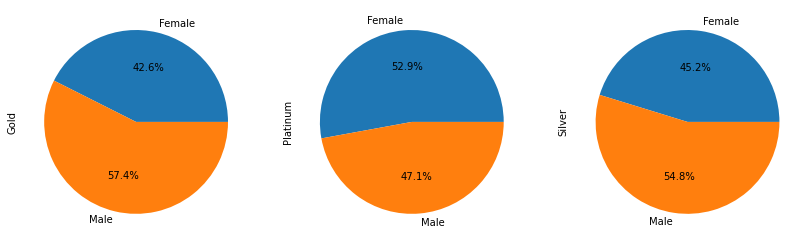

In [68]:
df.pivot_table(index = 'gender' , columns = 'Segment',
               aggfunc = 'sum', values = 'claim_amount').plot(kind = 'pie', subplots = True,
                                                              legend = False, figsize = (14,8), autopct = '%1.1f%%')
plt.show()

### Ques.12) Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

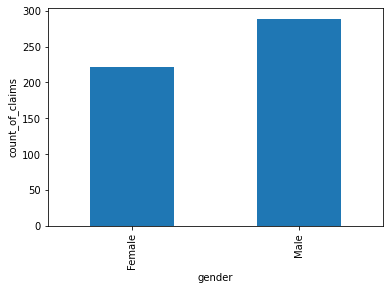

In [69]:
df.loc[df.incident_cause.str.lower().str.contains('driver')].groupby('gender').claim_id.count().plot(kind = 'bar',
                                                                                                    xlabel = 'gender',
                                                                                                    ylabel = 'count_of_claims')
plt.show()

### Ques.13) Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

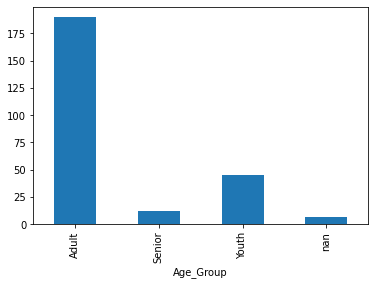

In [70]:
df.loc[df.fraudulent == 'Yes'].groupby('Age_Group').claim_id.count().plot(kind = 'bar')
plt.show()

### Ques.14) Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month”  axis, the month is in a chronological order not alphabetical order.

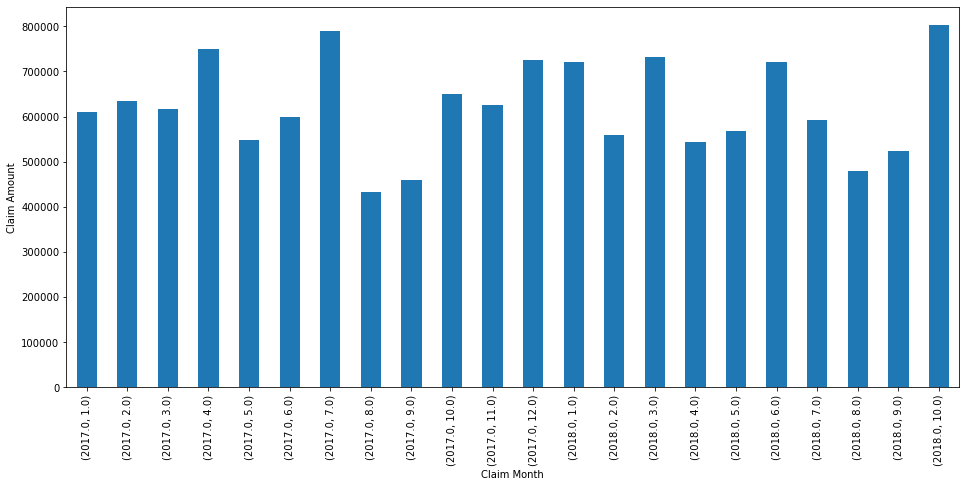

In [71]:
plt.figure(figsize = (16,7))
df.groupby([df.claim_date.dt.year, df.claim_date.dt.month]).claim_amount.sum().plot(kind = 'bar')
plt.xlabel('Claim Month')
plt.ylabel('Claim Amount')
plt.show()

### Ques.15) What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

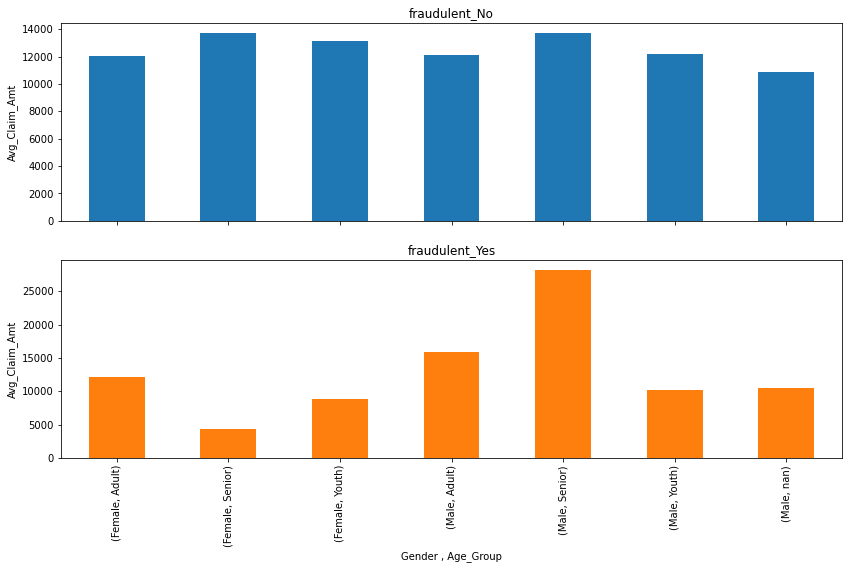

In [72]:
df.pivot_table(values = 'claim_amount', index = ['gender','Age_Group'], columns = 'fraudulent',
                       aggfunc = 'mean').add_prefix("fraudulent_").plot(kind = 'bar', subplots = True,
                                                                       legend = False, figsize = (14,8),
                                                                        ylabel = 'Avg_Claim_Amt', xlabel = 'Gender , Age_Group')
plt.show()

### Ques.16) Is there any similarity in the amount claimed by males and females?

In [73]:
# declare the variables
males = df.loc[df.gender == 'Male', 'claim_amount']
females = df.loc[df.gender == 'Female','claim_amount']

# display the mean
print('males_mean :',males.mean(),'| females_mean :',females.mean())

males_mean : 12793.768656195456 | females_mean : 12064.800411985014


In [74]:
# Ho : u1 = u2
# Ha : u1 <> u2

# CI : 95% , P-value : 0.05

# Rejection Rule : if the p-value from the statistical test comes out to be less than 0.05; we will reject the null hypothesis.

# Perform the test:
stats.ttest_ind(males, females)

# statistical conclusion : At CI = 95% , we can reject the null hypothesis.

# Business Conclusion : Amount Claimed by Males and Females customers are different from each other.

Ttest_indResult(statistic=0.9104294598170931, pvalue=0.36279461659966594)

### Ques.17) Is there any relationship between age category and segment?

In [75]:
# Get the observed frequency table from the dataset
obs_freq = pd.crosstab(index = df.Age_Group, columns = df.Segment)
obs_freq

Segment,Gold,Platinum,Silver
Age_Group,,,
Adult,287,268,255
Senior,15,17,17
Youth,74,80,79
nan,15,0,0


In [76]:
# Ho : No Relationship / Association
# Ha : Association

# CI : 95% , P-value : 0.05

# Rejection Rule : if the p-value from the statistical test comes out to be less than 0.05; we will reject the null hypothesis.

# perform the test:
stats.chi2_contingency(obs_freq)

# Statistical Conclusion : At CI = 95% , we can reject the null hypothesis.
# Business Conclusion : we have customers of different Age_Group belongs to different Segments.

(29.299442691206607,
 5.338997590196803e-05,
 6,
 array([[286.09756098, 267.07317073, 256.82926829],
        [ 17.3071364 ,  16.15627823,  15.53658537],
        [ 82.29719964,  76.82475158,  73.87804878],
        [  5.29810298,   4.94579946,   4.75609756]]))

### Ques.18) The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000

In [77]:
# mean values to be compared
pop_mean = 10000
mean_sample = df.loc[df.claim_date.dt.year == 2018,'claim_amount'].mean()

# display the means
print('pop_mean :',pop_mean,'| mean_sample :',mean_sample)

pop_mean : 10000 | mean_sample : 12638.007935222666


In [78]:
# Ho : u <= 10000
# Ha : u > 10000

# CI : 95% , P-value : 0.05

# Rejection Rule : if the p-value from the statistical test comes out to be less than 0.05; we will reject the null hypothesis.

# perform the test
sample = df.loc[df.claim_date.dt.year == 2018,'claim_amount']
stats.ttest_1samp(a = sample, popmean = pop_mean)

# Business Conclusion : Claim_Amount of current year has increased from the last year (2016-2017)

Ttest_1sampResult(statistic=4.3597076598467375, pvalue=1.5862341530431562e-05)

### Ques.19) Is there any difference between age groups and insurance claims?

In [79]:
# Declare the variables
Adult_cust = df.loc[df.Age_Group == 'Adult','claim_amount']
Youth_cust = df.loc[df.Age_Group == 'Youth','claim_amount']
Senior_cust = df.loc[df.Age_Group == 'Senior','claim_amount']

# display the means
print('Avg amount claimed by Adult :',Adult_cust.mean())
print('Avg amount claimed by Youth :',Youth_cust.mean())
print('Avg amount claimed by Senior :',Senior_cust.mean())

Avg amount claimed by Adult : 12555.932395061736
Avg amount claimed by Youth : 12056.025622317591
Avg amount claimed by Senior : 12928.758163265307


In [80]:
# Ho : All the samples are from same population (m1 = m2 = m3)
# Ha : All the samples are from different population

# CI : 95% , P-value : 0.05

# Rejection Rule : if the p-value from the statistical test comes out to be less than 0.05; we will reject the null hypothesis.

# Perform the test :
stats.f_oneway(Adult_cust, Youth_cust, Senior_cust)

# Statistical Conclusion : fail to reject the null hypothesis
# Business Conclusion : Insurance_Claim amounts of Adult, Youth and Senior are almost similar to each other

F_onewayResult(statistic=0.1581372804090484, pvalue=0.8537521744004772)

### Ques.20) Is there any relationship between total number of policy claims and the claimed amount?

<AxesSubplot:xlabel='total_policy_claims', ylabel='claim_amount'>

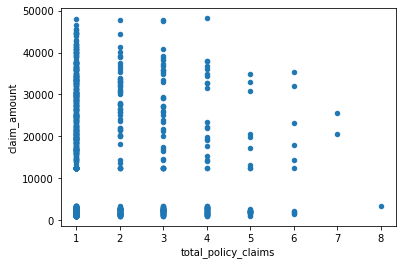

In [81]:
df.plot(kind = 'scatter', x = 'total_policy_claims', y = 'claim_amount')

In [82]:
df.loc[:,['total_policy_claims','claim_amount']].corr()          # No Relationship

,total_policy_claims,claim_amount
total_policy_claims,1.000000,-0.019981
claim_amount,-0.019981,1.000000


In [83]:
# Ho : No Relationship
# Ha : Association / Relationship

# CI : 95%, P-value : 0.05

# Rejection Rule : if the p-value from the statistical test comes out to be less than 0.05; we will reject the null hypothesis.

# Perform the Test:
stats.spearmanr(a = df.total_policy_claims, b = df.claim_amount)

# Statistics Conclusion: We fail to reject the Null Hypothesis, There is no Relationship between total_policy_claims 
                        # and claim_amount

# Business Conclusion: total_policy_claims doesn't affect claim_amount. They are not dependent on each other

SpearmanrResult(correlation=0.0026365065886759043, pvalue=0.9301772224005503)